## **SPAM SMS DETECTION**

In [1]:

!pip install opendatasets

In [3]:
import pandas as pd
import numpy as np

In [2]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

100%|██████████| 211k/211k [00:00<00:00, 36.9MB/s]

In [84]:
df = pd.read_csv("sms-spam-collection-dataset/spam.csv",encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Preprocessing**

In [85]:
drop_cols = df.drop(df.iloc[:, 0:2],axis = 1)
df.drop(columns=drop_cols, inplace=True)

In [86]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [15]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [16]:
newnames = {"v1":"Target","v2":"Message"}
df.rename(columns = newnames,inplace = True)

In [88]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Visualization**

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

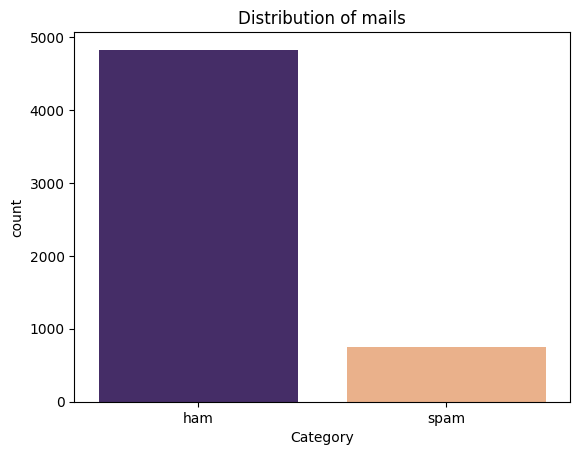

In [20]:
sns.countplot(data=df, x='Target', palette=['#432371',"#FAAE7B"])
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

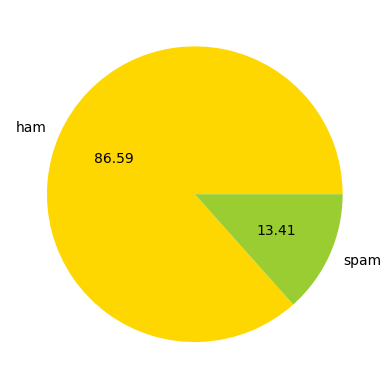

In [25]:
colors = ['gold', 'yellowgreen']
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=colors )
plt.show()

# **Training testing**

In [26]:
df.loc[df["Target"] == "spam", "Target"] = 0
df.loc[df["Target"] == "ham", "Target"] = 1

In [27]:
X = df["Message"]
Y = df["Target"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# **TF-IDF Vectorizer**

In [30]:

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [31]:
X_train_f = feature_extraction.fit_transform(X_train)
X_test_f = feature_extraction.transform(X_test)

In [32]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

# **Naive Bayes Classifier**

In [38]:
mnb = MultinomialNB()
mnb.fit(X_train_f, Y_train)

MultinomialNB()

In [52]:
mnb_prediction=mnb.predict(X_test_f)

In [54]:
accuracy_test_data=accuracy_score(Y_test,mnb_prediction)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.9605381165919282


# **Logistic Regression**

In [56]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_f, Y_train)

LogisticRegression()

In [62]:
logistic_prediction=lr_classifier.predict(X_test_f)

In [63]:
accuracy_test_data=accuracy_score(Y_test,logistic_prediction)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.9560538116591928


# **Support Vector Machines**

In [61]:
svm = LinearSVC()
svm.fit(X_train_f, Y_train)

LinearSVC()

In [64]:
svm_prediction=svm.predict(X_test_f)

In [65]:
accuracy_test_data=accuracy_score(Y_test,svm_prediction)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.9775784753363229


Prediction with Email message

In [70]:
mail=["Congratulations, you are selected for the CodSoft Internship Program."]
new_data_features=feature_extraction.transform(mail)
prediction=svm.predict(new_data_features)
print(prediction)

if(prediction[0]==0):
    print("This is SPAM Mail")
else:
    print("This is HAM Mail")

[1]
This is HAM Mail
